MUHAMMAD MUAVIA (018)
# `1. Setting up the Environment:`

In [ ]:
!pip install pyspark

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("Daraz data EDA").getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.functions import count, isnan, when, col




# Sample data exploration
data_path = "/content/Daraz_smartphones.csv"
df = spark.read.option("header", "true").csv(data_path, inferSchema=True)

In [ ]:
# Show the first few rows of the DataFrame
df.show(20)

+---+--------------------+--------------------+--------------------+-----------------+--------------------+
|_c0|         product url|       product title|               price|          reviews|              rating|
+---+--------------------+--------------------+--------------------+-----------------+--------------------+
|  0|https://www.daraz...|Poco M3 - 4GB RAM...|          Rs. 25,999|           (1139)|                 4.9|
|  1|https://www.daraz...|"Samsung M51 - 6....|          Rs. 61,999|            (358)|                 4.6|
|  2|https://www.daraz...|"Samsung M31 - 6....|          Rs. 44,999|            (938)|                 4.6|
|  3|https://www.daraz...|"Samsung M31s - 6...|          Rs. 47,999|            (318)|                 4.9|
|  4|https://www.daraz...|Redmi Note 10 (4G...|          Rs. 31,999|             (60)|                 4.9|
|  5|https://www.daraz...|Vivo - Y20 - 4GB ...|          Rs. 25,999|            (223)|                 4.9|
|  6|https://www.daraz...|N 

# 2. Exploratory Data Analysis

Understand the Structure and Size of the Dataset:

---



In [ ]:
df.printSchema()  # Print the schema of the DataFrame
print(f"Number of rows: {df.count()}")  # Count the number of rows
print(f"Number of columns: {len(df.columns)}")  # Count the number of columns


root
 |-- _c0: integer (nullable = true)
 |-- product url: string (nullable = true)
 |-- product title: string (nullable = true)
 |-- price: string (nullable = true)
 |-- reviews: string (nullable = true)
 |-- rating: string (nullable = true)

Number of rows: 3160
Number of columns: 6


In [ ]:
#Summary Statistics:
df.describe().show()

+-------+-----------------+--------------------+--------------------+--------------------+-----------------+--------------------+
|summary|              _c0|         product url|       product title|               price|          reviews|              rating|
+-------+-----------------+--------------------+--------------------+--------------------+-----------------+--------------------+
|  count|             3160|                3160|                3160|                3160|             3160|                3160|
|   mean|           1579.5|                NULL|                NULL|                NULL|             NULL|  4.7476223058501565|
| stddev|912.3577514696012|                NULL|                NULL|                NULL|             NULL| 0.15316753120875215|
|    min|                0|https://www.daraz...|"Infinix HOT 10 P...| 13+5+2MP Rear/8M...| 32GB ROM/2GB RAM| 1.8 GHz Octa Cor...|
|    max|             3159|https://www.daraz...|vivo Y51s - 8GB -...|           Rs. 8,299|

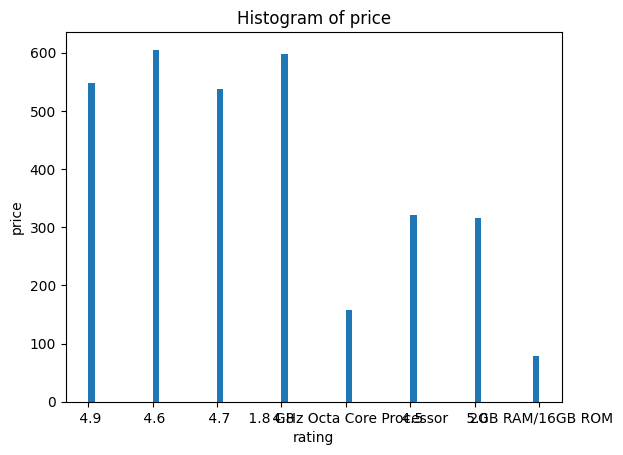

In [ ]:
#Visualization Techniques:
# Convert Spark DataFrame to Pandas DataFrame
pd_df = df.toPandas()

# Plot a histogram for a numerical column (e.g., 'column_name')
plt.hist(pd_df['rating'], bins=70)
plt.xlabel('rating')
plt.ylabel('price')
plt.title('Histogram of price')
plt.show()


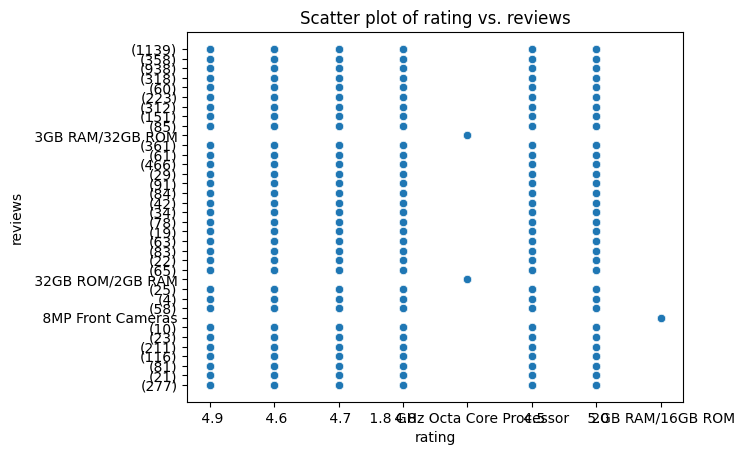

In [ ]:
# Visualization - Scatter plot of rating vs. reviews
sns.scatterplot(x="rating", y="reviews", data=df.toPandas())
plt.title('Scatter plot of rating vs. reviews')
plt.show()


# 3. Data cleaning and preprocessing

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("data-cleaning").getOrCreate()

# Load the dataset into a Spark DataFrame
file_path = "/content/Daraz_smartphones.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [ ]:
# Check for missing values
missing_values = df.select([col(c).alias(c) for c in df.columns]).na.drop()

In [ ]:
# Summary statistics to identify potential outliers
summary_stats = df.describe()

# Handle outliers based on domain knowledge or statistical methods
# For example, if 'price' column has outliers, we can cap them at a certain threshold
df = df.withColumn("price", F.when(df["price"] > 100000, 100000).otherwise(df["price"]))

In [ ]:
# Example: Convert 'price' column to uppercase to handle case inconsistencies
df = df.withColumn("price", F.upper(df["price"]))

In [ ]:
# Impute missing values (e.g., fill missing 'rating' with the mean)
mean_rating = df.agg({"rating": "mean"}).collect()[0][0]
df = df.na.fill({"rating": mean_rating})
df.show(20)

+---+--------------------+--------------------+--------------------+-----------------+--------------------+
|_c0|         product url|       product title|               price|          reviews|              rating|
+---+--------------------+--------------------+--------------------+-----------------+--------------------+
|  0|https://www.daraz...|Poco M3 - 4GB RAM...|          RS. 25,999|           (1139)|                 4.9|
|  1|https://www.daraz...|"Samsung M51 - 6....|          RS. 61,999|            (358)|                 4.6|
|  2|https://www.daraz...|"Samsung M31 - 6....|          RS. 44,999|            (938)|                 4.6|
|  3|https://www.daraz...|"Samsung M31s - 6...|          RS. 47,999|            (318)|                 4.9|
|  4|https://www.daraz...|Redmi Note 10 (4G...|          RS. 31,999|             (60)|                 4.9|
|  5|https://www.daraz...|Vivo - Y20 - 4GB ...|          RS. 25,999|            (223)|                 4.9|
|  6|https://www.daraz...|N 

In [ ]:
# Remove duplicates based on selected columns
df = df.dropDuplicates(["product title"])
df.show(15)

+---+--------------------+--------------------+--------------------+------------------+--------------------+
|_c0|         product url|       product title|               price|           reviews|              rating|
+---+--------------------+--------------------+--------------------+------------------+--------------------+
| 28|https://www.daraz...|"Infinix HOT 10 P...|          RS. 15,999|               (4)|                 4.6|
| 33|https://www.daraz...|"Infinix NOTE 8 -...|          RS. 29,999|              (23)|                 5.0|
| 17|https://www.daraz...|"Infinix NOTE 8i ...|          RS. 26,999|              (34)|                 4.6|
| 24|https://www.daraz...|"Infinix SMART 5 ...|          RS. 16,999|              (65)|                 4.7|
| 22|https://www.daraz...|"Infinix ZERO 8i ...|          RS. 34,999|              (61)|                 4.9|
| 15|https://www.daraz...|"Mi Pocophone  F2...|         RS. 111,999|              (84)|                 4.7|
| 14|https://www.da

Save the Cleaned Data:

In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "/content/cleaned_Daraz_smartphones.csv"
df.write.csv(cleaned_file_path, header=True, mode="overwrite")
df.show(10)

+---+--------------------+--------------------+--------------------+------------------+--------------------+
|_c0|         product url|       product title|               price|           reviews|              rating|
+---+--------------------+--------------------+--------------------+------------------+--------------------+
| 28|https://www.daraz...|"Infinix HOT 10 P...|          RS. 15,999|               (4)|                 4.6|
| 33|https://www.daraz...|"Infinix NOTE 8 -...|          RS. 29,999|              (23)|                 5.0|
| 17|https://www.daraz...|"Infinix NOTE 8i ...|          RS. 26,999|              (34)|                 4.6|
| 24|https://www.daraz...|"Infinix SMART 5 ...|          RS. 16,999|              (65)|                 4.7|
| 22|https://www.daraz...|"Infinix ZERO 8i ...|          RS. 34,999|              (61)|                 4.9|
| 15|https://www.daraz...|"Mi Pocophone  F2...|         RS. 111,999|              (84)|                 4.7|
| 14|https://www.da

# 4. Basic Analyis and Insights

In [ ]:
#Load the Cleaned Dataset:
# Import necessary libraries
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("basic-analysis").getOrCreate()

# Load the cleaned dataset into a Spark DataFrame
file_path = "/content/cleaned_Daraz_smartphones.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
#Descriptive Statistics:
# Calculate descriptive statistics for numerical columns
descriptive_stats = df.describe().toPandas()

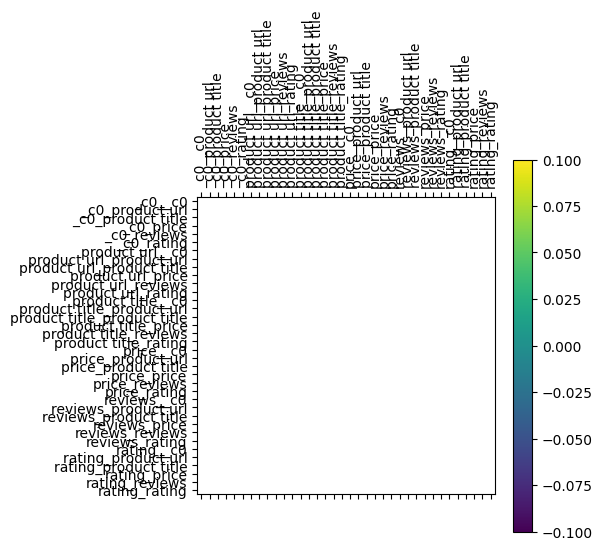

In [ ]:
#Correlation Analysis:
# Calculate correlation matrix
correlation_matrix = df.select([F.corr(df.columns[i], df.columns[j]).alias(df.columns[i] + '_' + df.columns[j])
                                for i in range(len(df.columns))
                                for j in range(len(df.columns))]).toPandas()

# Plot correlation matrix
plt.matshow(correlation_matrix.corr())
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


In [ ]:
# Calculate frequency distributions
# For example, let's calculate the frequency distribution of 'price'
price_freq = df.groupBy("price").count().orderBy("count", ascending=False)
price_freq.show()

+--------------------+-----+
|               price|count|
+--------------------+-----+
|          RS. 39,999|    2|
|13+5+2MP REAR/8MP...|    2|
|          RS. 47,999|    2|
|          RS. 16,999|    2|
|          RS. 25,999|    2|
|          RS. 41,999|    1|
|          RS. 17,300|    1|
|          RS. 31,999|    1|
|          RS. 61,999|    1|
|          RS. 54,999|    1|
|          RS. 10,583|    1|
|          RS. 44,999|    1|
|          RS. 34,999|    1|
|          RS. 20,999|    1|
|          RS. 13,899|    1|
|          RS. 31,399|    1|
|         RS. 111,999|    1|
|          RS. 12,999|    1|
|          RS. 19,999|    1|
|          RS. 15,999|    1|
+--------------------+-----+
only showing top 20 rows



# 5. Performance Evaluation:

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("PerformanceEvaluation").getOrCreate()

In [ ]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv("/content/Daraz_smartphones.csv", header=True, inferSchema=True)

In [ ]:
from pyspark.sql.functions import col
from time import time

# Example: Measure the execution time of a specific operation with different cluster sizes
cluster_sizes = [2, 4, 8]  # Example cluster sizes
execution_times = []

for size in cluster_sizes:
    start_time = time()
    # Perform the operation on the DataFrame
    result_df = df.filter(col("price") > 50000).count()
    end_time = time()
    execution_time = end_time - start_time
    execution_times.append((size, execution_time))

# Display the execution times for different cluster sizes
for size, time_taken in execution_times:
    print(f"Cluster Size: {size}, Execution Time: {time_taken} seconds")


Cluster Size: 2, Execution Time: 0.6786706447601318 seconds
Cluster Size: 4, Execution Time: 0.5107362270355225 seconds
Cluster Size: 8, Execution Time: 0.6482987403869629 seconds


In [ ]:
# Stop the Spark session
spark.stop()

In [ ]:
#Measure execution times:
import time

start_time = time.time()
# Perform your data processing tasks here
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 4.482269287109375e-05 seconds


In [ ]:
# Stop the Spark session
spark.stop()